### Implement K-Nearest Neighbors
<img src="pics/city-1.jpg" width="800" height="400">
In this article you're going to learn about K-Nearest Neighbors and machine learning workflow (after getting cleaned dataset).

### Agenda
1. How does it work?
2. Calculating distance.
3. Implement K-Nearest Neighbors on quantitative data.
4. Implement K-Nearest Neighbors on qualitative data.

### 1. How does it work?
As the core concept of K-Nearest Neighbors is to take the majority vote of **K** samples which are the **most similar** to the new sample.  
The procedures below show how the algorithm works.

<img src="pics/knn-1.png" width="1000">

```
1. Calculate distance between new sample and other labeled samples.
2. Sort samples by its distance value from low to high.
3. Get first K samples which have the lowest distance value.  
4. a) If target prediction is quantitative data, target prediction can be calculated by averaging outputs of the K samples.  
   b) If target prediction is qualitative data, target prediction can be calculated by getting most frequent outputs of the K samples.
```

### 2. Calculating distance
There are two ways to calculate distance for K-Nearest Neighbors.  

<img src="pics/calculate_distance.png" width="650">

2.1. Manhattan distance can be calculated as folowing:  
#### $$d = \sum_{i=1}^{N} |x_i - y_i|$$
2.2. Euclidean distance can be calculated as following:
#### $$d = \sqrt{\sum_{i=1}^{N} (x_i - y_i)^2}$$
Let's implement modules to calculate Manhattan distance and Euclidean distance below.

In [1]:
import numpy as np
from utilities.ManhattanDistance import ManhattanDistance as ExampleManhattanDistance
from utilities.EuclideanDistance import EuclideanDistance as ExampleEuclideanDistance

In [2]:
class ManhattanDistance:
    def __call__(self, samples, new_sample):
        """ 
        samples shape: (sample_nums, feature_nums)
        new_sample shape: (1, feature_nums)
        Return Manhanttan distance between new sample point and other sample points with shape (sample_nums, )
        """
        distance = np.sum(np.abs(samples - new_sample), axis=-1)
        return distance

In [3]:
# Test ManhattanDistance
samples = np.random.uniform(-10, 10, size=(100, 10))
new_sample = np.random.uniform(-10, 10, size=(1, 10))

# Test Manhanttan Distance
example_manhanttan = ExampleManhattanDistance()
manhanttan = ManhattanDistance()

example_manhanttan_distance = example_manhanttan(samples, new_sample)
manhanttan_distance = manhanttan(samples, new_sample)

assert np.sum(example_manhanttan_distance - manhanttan_distance, dtype=np.float32) == 0.0
print("pass")

pass


In [4]:
class EuclideanDistance:
    def __call__(self, samples, new_sample):
        """
        samples shape: (sample_nums, feature_nums)
        new_sample shape: (1, feature_nums)
        Return Euclidean distance between new sample point and other sample points with shape (sample_nums, )
        """
        distance = np.sqrt(np.sum(np.square(samples - new_sample), axis=-1))
        return distance

In [5]:
# Test EuclideanDistance
samples = np.random.uniform(-10, 10, size=(100, 10))
new_sample = np.random.uniform(-10, 10, size=(1, 10))

# Test Euclidean Distance
example_euclidean = ExampleEuclideanDistance()
euclidean = EuclideanDistance()

example_euclidean_distance = example_euclidean(samples, new_sample)
euclidean_distance = euclidean(samples, new_sample)

assert np.sum(example_euclidean_distance - euclidean_distance, dtype=np.float32) == 0.0
print("pass")

pass


### 3. Implement K-Nearest Neighbors on quantitative data
In this practice we're going to use KNN to predict house price. The dataset has 4600 samples each consists of price that we want to predict and various features such as number of bedrooms, number of bathrooms, number of floors, size, location and etc., we need to preprocess such features and use them to predict the particular house price.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 3.1. Load dataset

In [7]:
# Load dataset
house_data = pd.read_csv("./datasets/housedata/data.csv")

### 3.2. Explore dataset

In [8]:
# Show some samples of the dataset
house_data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


There are 18 columns, 1 columns for target price prediction and and 17 columns for features. However, we do not need to use all of them so let's investigate which one should we cut it out.

In [9]:
# date
house_data.date.unique()

array(['2014-05-02 00:00:00', '2014-05-03 00:00:00',
       '2014-05-04 00:00:00', '2014-05-05 00:00:00',
       '2014-05-06 00:00:00', '2014-05-07 00:00:00',
       '2014-05-08 00:00:00', '2014-05-09 00:00:00',
       '2014-05-10 00:00:00', '2014-05-11 00:00:00',
       '2014-05-12 00:00:00', '2014-05-13 00:00:00',
       '2014-05-14 00:00:00', '2014-05-15 00:00:00',
       '2014-05-16 00:00:00', '2014-05-17 00:00:00',
       '2014-05-18 00:00:00', '2014-05-19 00:00:00',
       '2014-05-20 00:00:00', '2014-05-21 00:00:00',
       '2014-05-22 00:00:00', '2014-05-23 00:00:00',
       '2014-05-24 00:00:00', '2014-05-25 00:00:00',
       '2014-05-26 00:00:00', '2014-05-27 00:00:00',
       '2014-05-28 00:00:00', '2014-05-29 00:00:00',
       '2014-05-30 00:00:00', '2014-05-31 00:00:00',
       '2014-06-01 00:00:00', '2014-06-02 00:00:00',
       '2014-06-03 00:00:00', '2014-06-04 00:00:00',
       '2014-06-05 00:00:00', '2014-06-06 00:00:00',
       '2014-06-07 00:00:00', '2014-06-08 00:0

Date column is almost useless **in this case** because all sample gathered in small time period (about 2 months) in 2014 so that inflation is not to be considered in this dataset, but keep in mind that model learns only from this dataset is not going to work well when predict nowadays house price.

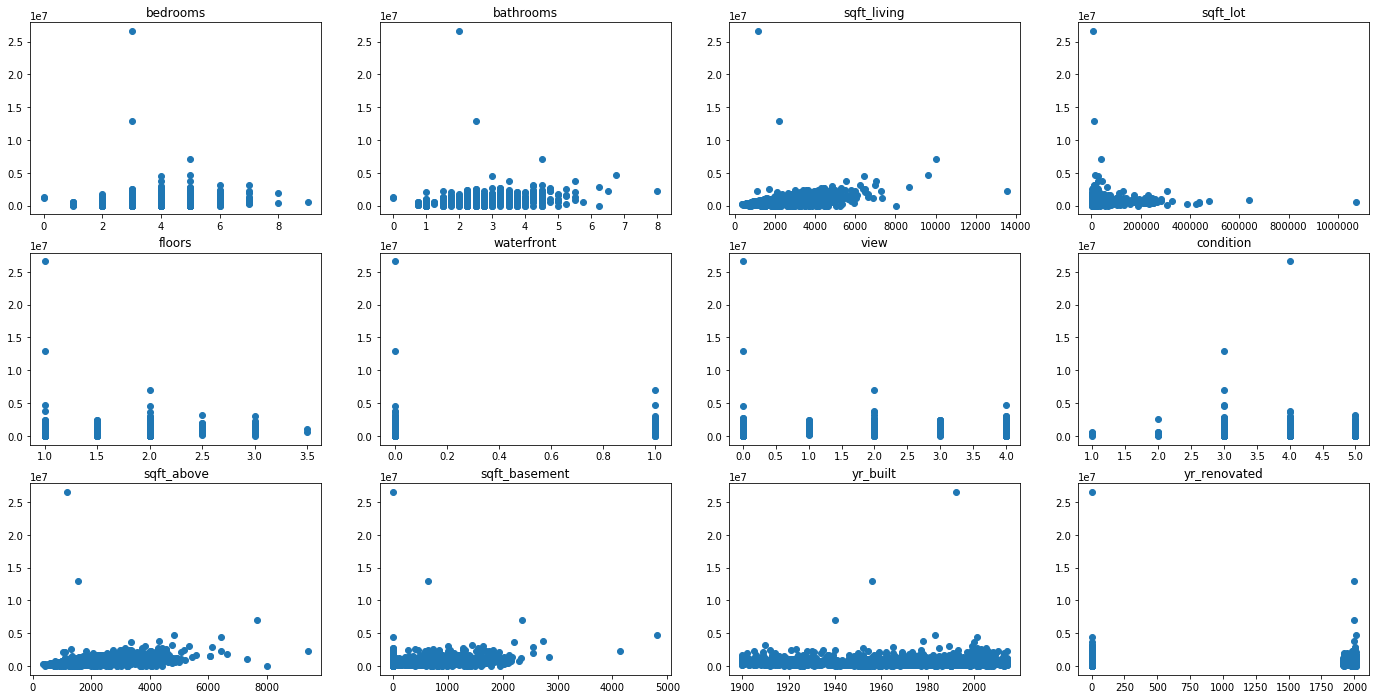

In [10]:
# bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated
cols = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]
plt.figure(figsize=(24, 12))

for i, column_name in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    plt.scatter(house_data[column_name], house_data.price)
    plt.title(column_name)

plt.show()

Since there are 3 outlier points that make all graph look flat, so let's remove that outlier points and plot the graph again.  
Moreover, yr_built and yr_renovated are repeatitive so let's convert them into house_age.

In [11]:
# Convert yr_built and yr_renovated into house_age
house_age = 2014 - np.maximum(house_data.yr_built, house_data.yr_renovated)
house_age = pd.Series(house_age, name="house_age")
house_data = pd.concat([house_data.drop(columns=["yr_built", "yr_renovated"]), house_age], axis=1)

# Update cols
cols.remove("yr_built")
cols.remove("yr_renovated")
cols.append("house_age")

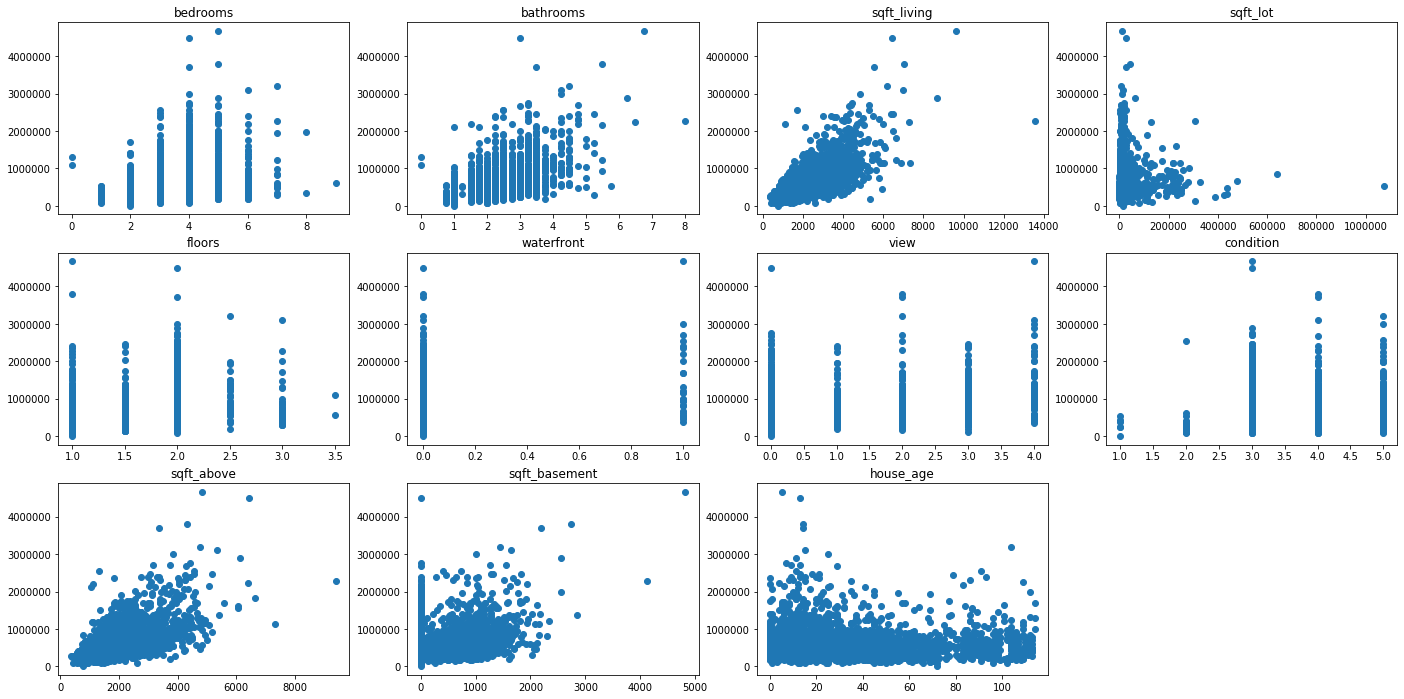

In [12]:
# bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, house_age
plt.figure(figsize=(24, 12))

without_outlier = house_data.query("0 < price < 5000000")
for i, column_name in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    plt.scatter(without_outlier[column_name], without_outlier.price)
    plt.title(column_name)

plt.show()

So far, all 12 features above look useful except house_age that almost competely flat.

In [13]:
# street, city, statezip, country
print(f"street unique count: {len(house_data.street.unique())}")
print(f"city unique count: {len(house_data.city.unique())}")
print(f"statezip unique count: {len(house_data.statezip.unique())}")
print(f"country unique count: {len(house_data.country.unique())}")

street unique count: 4525
city unique count: 44
statezip unique count: 77
country unique count: 1


All of these features are telling us about the same thing, that is location. Actually it would be better if we can turn these features into longitude and latitude, but for now let's use it this way.  
**street** is not really useful in this case because it almost specific to each of the sample.  
**city** and **statezip** can be useful but they are repetitive because both are location information, however, statezip is more precise than city. For this reason, only use one of them would be find.  
**country** is completely useless in this case because it identical to every samples.

To summarize, 
1. We will not utilize the following columns **date**, **street**, **country**, **house_age** and either **city** or **statezip**.

### 3.3. Prepare data

In [14]:
# Remove columns
data = house_data.drop(columns=["date", "street", "country", "house_age", "statezip"])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond


In [15]:
# One-hot encoding categorical columns
categorical_cols = ["view", "condition", "city"]

for col in categorical_cols:
    city_encoded = pd.get_dummies(data[col])
    city_encoded.columns = [col + "_" + str(_col) for _col in city_encoded.columns]
    data = pd.concat([data.drop(columns=col), city_encoded], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,1340,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,3370,280,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,1930,0,1,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,1000,1000,1,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,1140,800,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Seperate prediction/feature
data_x = data.drop(columns="price")
data_y = data.price
print(f"data_x: {data_x.shape}")
print(f"data_y: {data_y.shape}")

data_x: (4600, 62)
data_y: (4600,)


In [17]:
from sklearn.model_selection import train_test_split

train_x: (3680, 62)
test_x: (920, 62)
train_y: (3680,)
test_y: (920,)


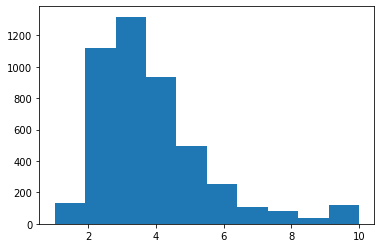

In [18]:
# Split train/test
# Group y into bins
bins = np.linspace(0, 1500000, 10)
y_binned = np.digitize(data_y, bins)
plt.hist(y_binned)

# Split with stratify
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42, shuffle=True, stratify=y_binned)
print(f"train_x: {train_x.shape}")
print(f"test_x: {test_x.shape}")
print(f"train_y: {train_y.shape}")
print(f"test_y: {test_y.shape}")

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Normalize all features to be in range [0, 1] for training set
scaler = MinMaxScaler()
scaler.fit(train_x)

train_x_scaled = scaler.transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=train_x.columns)
train_x_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,view_1,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.377597,0.270126,0.133733,0.021692,0.207120,0.006522,0.160482,0.064420,0.899457,0.014130,...,0.007337,0.345924,0.025815,0.000543,0.016304,0.000272,0.006793,0.006522,0.026359,0.000543
std,0.101168,0.098325,0.073196,0.051348,0.216682,0.080504,0.095197,0.096270,0.300764,0.118045,...,0.085353,0.475733,0.158605,0.023309,0.126660,0.016485,0.082153,0.080504,0.160221,0.023309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.218750,0.082764,0.006810,0.000000,0.000000,0.090708,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.281250,0.121488,0.010948,0.200000,0.000000,0.133850,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.312500,0.170084,0.016072,0.400000,0.000000,0.212389,0.124481,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Normalize all features to be in range [0, 1] for test set
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=test_x.columns)
test_x_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,view_1,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,920.0,920.000000,920.000000,920.000000,920.000000
mean,0.378986,0.270007,0.136802,0.024185,0.195652,0.009783,0.164080,0.066057,0.902174,0.018478,...,0.002174,0.326087,0.030435,0.001087,0.011957,0.0,0.004348,0.005435,0.019565,0.002174
std,0.100288,0.096602,0.072885,0.071728,0.209623,0.098476,0.096069,0.096430,0.297241,0.134746,...,0.046600,0.469035,0.171874,0.032969,0.108749,0.0,0.065830,0.073560,0.138576,0.046600
min,0.000000,0.000000,0.011390,0.000067,0.000000,0.000000,0.016593,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.218750,0.085042,0.007434,0.000000,0.000000,0.090431,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.281250,0.124146,0.011111,0.200000,0.000000,0.139381,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.312500,0.173880,0.016546,0.400000,0.000000,0.219027,0.130705,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,0.777778,0.687500,0.501898,1.675989,0.800000,1.000000,0.548673,0.452282,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [22]:
# Convert type to numpy array
train_x_scaled = train_x_scaled.to_numpy()
train_x, train_y = train_x.to_numpy(), train_y.to_numpy()
test_x_scaled, test_y = test_x_scaled.to_numpy(), test_y.to_numpy()

### 3.4. Prepare model

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
class RegressionKNN:
    def __init__(self, k=5, distance_method="Euclidean"):
        assert distance_method.lower() == "euclidean" or distance_method.lower() == "manhattan", \
        f"distance_method must be either Euclidean or Manhattan, but get {distance_method}"
        super().__init__()
        # Initial properties
        self.k = k
        self.distance_method = None
        self.x = None
        self.y = None
        
        # Get measure methods
        if distance_method.lower() == "euclidean":
            self.distance_method = EuclideanDistance()
        else:
            self.distance_method = ManhattanDistance()
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def _predict(self, x):
        # Get distance between new sample and other samples
        distance = self.distance_method(self.x, x)

        # Get top k closest indices
        top_k_indices = np.argsort(distance)[:self.k]

        # Get top k closest y
        top_k_y = self.y[top_k_indices]

        # Average top_k_y
        predict = np.mean(top_k_y)
        return predict
    
    def predict(self, x):
        preds = []
        for _x in x:
            pred = self._predict(_x)
            preds.append(pred)
        return np.asarray(preds)

In [25]:
# Test RegressionKNN
regression_model = RegressionKNN(k=5, distance_method="Euclidean")    # KNeighborsRegressor uses Euclidean distance
ex_regression_model = KNeighborsRegressor(n_neighbors=5)

x = np.random.uniform(low=0, high=5, size=(10, 5))
y = np.random.uniform(low=0, high=1000, size=(10, ))

regression_model.fit(x, y)
ex_regression_model.fit(x, y)

pred = regression_model.predict(x)
ex_pred = ex_regression_model.predict(x)

assert np.all(np.equal(pred, ex_pred))
print("Pass")

Pass


### 3.5. Fit and evaluate model
Before start training our model we must decide
### 3.5.1. Evaluate metrics
Metrics are functions that is used to measure how good or bad is our model. One of the nost popular metrics for quantitative data is **Mean Absolute Error (MAE)**, it is used to measure the average magnitude of errors between predictions and actual observations by calculating mean absolute differences between the two values.
#### $$MAE = \frac{1}{n}\sum_{i=1}^{N} |y_i - \hat{y_i}|$$

In [26]:
from tensorflow.keras.losses import MeanAbsoluteError as ExampleMeanAbsoluteError

In [27]:
class MeanAbsoluteError:
    def __call__(self, y_true, y_pred):
        """
        y_true: Target predictions with shape (batch_size, class_nums)
        y_pred: Predictions with shape (batch_size, class_nums)
        Return scalar value of MAE
        """
        mae = np.mean(np.sum(np.abs(y_true - y_pred), axis=-1), axis=0)
        return mae

In [28]:
# Test MeanAbsoluteError
y_true = np.random.uniform(low=0, high=5, size=(10, 5))
y_pred = np.random.uniform(low=0, high=5, size=(10, 5))

metrics_example = ExampleMeanAbsoluteError()
metrics = MeanAbsoluteError()

mae_example = metrics_example(y_true, y_pred)
mae = metrics_example(y_true, y_pred)
print(f"mae_example: {mae_example}")
print(f"mae: {mae}")

assert mae_example == mae
print("Pass")

mae_example: 1.813123345375061
mae: 1.813123345375061
Pass


### 3.5.2. Validation set
Validation set is a set of data which split from training set for evaluating model while doing hyperparameter tuning to avoid data leakage.
### 3.5.2.1. Split validation
Split some partial of training set and use it to evaluate trained model.

<img src="pics/split_validation.png" width="900">

In [29]:
class SplitValidation:
    def __init__(self, metrics, val_size=0.2, random_state=None, shuffle=True, stratify=None, scaler=None):
        # Initial properties
        self.metrics = metrics
        self.val_size = val_size
        self.random_state = random_state
        self.shuffle = shuffle
        self.stratify = stratify
        self.scaler = scaler
        
    def eval(self, model, x, y):
        # Split train/val
        train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=self.val_size, 
                                                          random_state=self.random_state, 
                                                          shuffle=self.shuffle, 
                                                          stratify=self.stratify)
        
        # Normalization
        if scaler is not None:
            train_x = scaler.fit_transform(train_x)
            val_x = scaler.transform(val_x)
        
        # Fit training set to model
        model.fit(train_x, train_y)

        # Evaluate model with validation set
        pred_y = model.predict(val_x)
        score = self.metrics(val_y.reshape(-1, 1), pred_y.reshape(-1, 1))
        return score

In [30]:
# Group y into bins
bins = np.linspace(0, 1500000, 10)
y_binned = np.digitize(train_y, bins)

model = RegressionKNN(k=5, distance_method="Euclidean")
metrics = MeanAbsoluteError()
scaler = MinMaxscaler()
evaluator = SplitValidation(metrics, random_state=42, stratify=y_binned, scaler=scaler)

score = evaluator.eval(model, train_x, train_y)
print(f"Validation error: {score}")

Validation error: 128482.00498899755


### Advantage and disadvantage of using Split validation.  
**Advantage**  
- Cheap to compute. 

**Disadvantage**  
- It sacrifice partial of training set.
- Validation set can be bias especially when it has small size (< 10000).

### 3.5.2.2. K-fold cross validation
K-fold cross validation is a better way to evaluate model than the split validation by evaluating model k times each time with different trining and validation set, the following steps show how is works.  

<img src="pics/k-fold_cross_validation.png" width="1100">

```
1. Divide training set into k folds
2. for i in range(k):
3.    Initial new model
4.    validation fold is the data at fold i
5.    training fold is the rest of the data
6.    Train model on training_fold
7.    Evaluate model on validation_fold
8.    Save evaluation result
9. Average all evaluation results
```

In [31]:
from sklearn.model_selection import KFold

In [32]:
class CrossValidation:
    def __init__(self, metrics, k_folds=10, scaler=None):
        # Initial properties
        self.metrics = metrics
        self.k_folds = k_folds
        self.scaler = scaler
        self.scores = []
        
    def eval(self, model, x, y):
        # Divide training set into k folds
        kf = KFold(n_splits=self.k_folds)
        self.scores = []
        for i, (train_index, val_index) in enumerate(kf.split(x)):
            # Get validation fold
            val_x, val_y = x[val_index], y[val_index]

            # Get training fold
            train_x, train_y = x[train_index], y[train_index]

            # Normalization
            if scaler is not None:
                train_x = scaler.fit_transform(train_x)
                val_x = scaler.transform(val_x)

            # Train model on training set
            model.fit(train_x, train_y)

            # Evaluate model on validation set
            pred_y = model.predict(val_x)
            score = self.metrics(val_y.reshape(-1, 1), pred_y.reshape(-1, 1))

            # Save evaluation result
            self.scores.append(score)
        # Average all evaluation results
        mean_score = np.mean(self.scores)
        return mean_score

In [33]:
model = RegressionKNN(k=5, distance_method="Euclidean")
metrics = MeanAbsoluteError()
scaler = MinMaxscaler()
evaluator = CrossValidation(metrics, k_folds=10, scaler=scaler)

score = evaluator.eval(model, train_x, train_y)
print(f"Validation errors: {evaluator.scores}")
print(f"Validation mean error: {score}")

Validation errors: [160585.61039419728, 132047.3540179326, 158908.18482004185, 129904.60760600597, 157746.39277449294, 143810.7424081087, 164851.77799839186, 141501.40863501903, 203147.75897196413, 141720.2282896049]
Validation mean error: 153422.40659157594


### Advantage and disadvantage of using Cross validation.  
**Advantage**  
- Always more accurate than split validation.

**Disadvantage**  
- Computationally expensive.

### Split validation and cross validation summarize
1. If dataset size is small (< 10000) -> cross validation.
2. If it doesn't take too long to train and validate per model -> cross validation.
3. otherwise -> split validation.

### 3.6. Search for best hyperparameters
There are various of ways to search for best hyperparameters. However, there are two basic ways to do so that are Grid search and Random search.
### 3.6.1. Grid searching
Implementation of grid search is simple, we define a set of values for each hyperparameter then we evaluate models which created based on every combination of all set of hyperparameters and choose only the best one.

<img src="pics/GridSearch.png" width="300">

In [34]:
from sklearn.model_selection import ParameterGrid

In [35]:
class GridSearcher:
    def __init__(self, evaluator, criteria="min"):
        assert criteria.lower() == "min" or criteria.lower() == "max", "criteria can be either 'max' or 'min'"
        # Initial properties
        self.evaluator = evaluator
        self.criteria = criteria
        
    def search(self, model_class, x, y, params_grid, report=True):
        # Get parameters space
        param_space = list(ParameterGrid(params_grid))
        
        # Reset
        best_params = None
        best_score = None
        for params in param_space:
            # Create model with new parameters
            model = model_class(**params)
            
            # Evaluate model
            score = self.evaluator.eval(model, x, y)
            
            # Save best parameters and best score
            if best_params is None and best_score is None:
                best_params = params
                best_score = score
            else:
                if self.criteria == "min":
                    if score < best_score:
                        best_params = params
                        best_score = score
                else:
                    if score > best_score:
                        best_params = params
                        best_score = score
                    
            # Report
            if report:
                print(f"parameters: {params} score: {score}")
        return best_params, best_score

In [36]:
metrics = MeanAbsoluteError()
evaluator = CrossValidation(metrics, k_folds=10)
searcher = GridSearcher(evaluator, criteria="min")

# Search for best parameters
params_grid = {"k": list(range(1, 41)), "distance_method": ["Euclidean", "Manhattan"]}
best_params, score = searcher.search(RegressionKNN, train_x, train_y, params_grid)
print(f"best parameters: {best_params}")
print(f"score: {score}")

parameters: {'distance_method': 'Euclidean', 'k': 1} score: 183888.5494003598
parameters: {'distance_method': 'Euclidean', 'k': 2} score: 163110.0728077765
parameters: {'distance_method': 'Euclidean', 'k': 3} score: 158863.39335492818
parameters: {'distance_method': 'Euclidean', 'k': 4} score: 156224.7117937424
parameters: {'distance_method': 'Euclidean', 'k': 5} score: 153422.40659157594
parameters: {'distance_method': 'Euclidean', 'k': 6} score: 152510.56938415483
parameters: {'distance_method': 'Euclidean', 'k': 7} score: 155103.43045743747
parameters: {'distance_method': 'Euclidean', 'k': 8} score: 158119.7100047923
parameters: {'distance_method': 'Euclidean', 'k': 9} score: 157921.9928241938
parameters: {'distance_method': 'Euclidean', 'k': 10} score: 159206.05528160906
parameters: {'distance_method': 'Euclidean', 'k': 11} score: 159576.3031879383
parameters: {'distance_method': 'Euclidean', 'k': 12} score: 160349.40749130963
parameters: {'distance_method': 'Euclidean', 'k': 13} s

### 3.6.2. Random searching
Grid searching however has big problem when number of hyperparameters get large, trying out every combination of them take long time to run. For this reason, instead of trying out all combination we randomly try out only some of them, this way not only help **reduce search time** but also **increase number of search point for individual hyperparameter** as shown in figure below. Therefore, **Random searching is recommended** over Grid searching when number of hyperparameters is large or some hyperparameters are float.

<img src="pics/RandomSearch.png" width="300">

In [37]:
class RandomSearcher:
    def __init__(self, evaluator, criteria="min", nums=None):
        assert criteria.lower() == "min" or criteria.lower() == "max", "criteria can be either 'max' or 'min'"
        # Initial properties
        self.evaluator = evaluator
        self.criteria = criteria
        self.nums = nums
        
    def search(self, model_class, x, y, params_grid, report=True):
        # Get parameters space
        param_space = list(ParameterGrid(params_grid))
        nums = len(param_space) if self.nums is None else self.nums
        assert nums <= len(param_space), f"nums cannot be bigger than {len(param_space)}"
        param_space = np.random.choice(param_space, size=nums, replace=False)
        
        # Reset
        best_params = None
        best_score = None
        for params in param_space:
            # Create model with new parameters
            model = model_class(**params)
            
            # Evaluate model
            score = self.evaluator.eval(model, x, y)
            
            # Save best parameters and best score
            if best_params is None and best_score is None:
                best_params = params
                best_score = score
            else:
                if self.criteria == "min":
                    if score < best_score:
                        best_params = params
                        best_score = score
                else:
                    if score > best_score:
                        best_params = params
                        best_score = score
                    
            # Report
            if report:
                print(f"parameters: {params} score: {score}")
        return best_params, best_score

In [38]:
metrics = MeanAbsoluteError()
evaluator = CrossValidation(metrics, k_folds=10)
searcher = RandomSearcher(evaluator, criteria="min", nums=10)

# Search for best parameters
params_grid = {"k": list(range(1, 41)), "distance_method": ["Euclidean", "Manhattan"]}
best_params, score = searcher.search(RegressionKNN, train_x, train_y, params_grid)
print(f"best parameters: {best_params}")
print(f"score: {score}")

parameters: {'distance_method': 'Euclidean', 'k': 32} score: 168559.9655476064
parameters: {'distance_method': 'Manhattan', 'k': 15} score: 160040.00838920148
parameters: {'distance_method': 'Euclidean', 'k': 26} score: 166345.67078481364
parameters: {'distance_method': 'Manhattan', 'k': 6} score: 151555.6630373063
parameters: {'distance_method': 'Manhattan', 'k': 30} score: 165985.13518700196
parameters: {'distance_method': 'Euclidean', 'k': 18} score: 163475.35832739546
parameters: {'distance_method': 'Euclidean', 'k': 16} score: 163365.74871118108
parameters: {'distance_method': 'Manhattan', 'k': 35} score: 166744.10901345208
parameters: {'distance_method': 'Manhattan', 'k': 25} score: 163672.85447148778
parameters: {'distance_method': 'Euclidean', 'k': 2} score: 163110.0728077765
best parameters: {'distance_method': 'Manhattan', 'k': 6}
score: 151555.6630373063


### 3.7. Evaluate on test set

In [39]:
# Define model and metrics
model = RegressionKNN(**best_params)
metrics = MeanAbsoluteError()

# Fit model on traning set
model.fit(train_x_scaled, train_y)

# Evaluate on test set
pred_y = model.predict(test_x_scaled)
score = metrics(test_y.reshape(-1, 1), pred_y.reshape(-1, 1))
print(f"Test error: {score}")

Test error: 142887.35847263696


### 4. Implement K-Nearest Neighbors on qualitative data
In this practice we're going to use KNN to classify species of iris flower. The only different here is that now our target prediction is categorical instead of continuous values.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 4.1. Load data

In [41]:
# Load dataset
iris_data = pd.read_csv("./datasets/Iris/Iris.csv")

### 4.2. Explore dataset

In [42]:
# Show some samples of the dataset
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


We have very few number of samples, 150 samples.

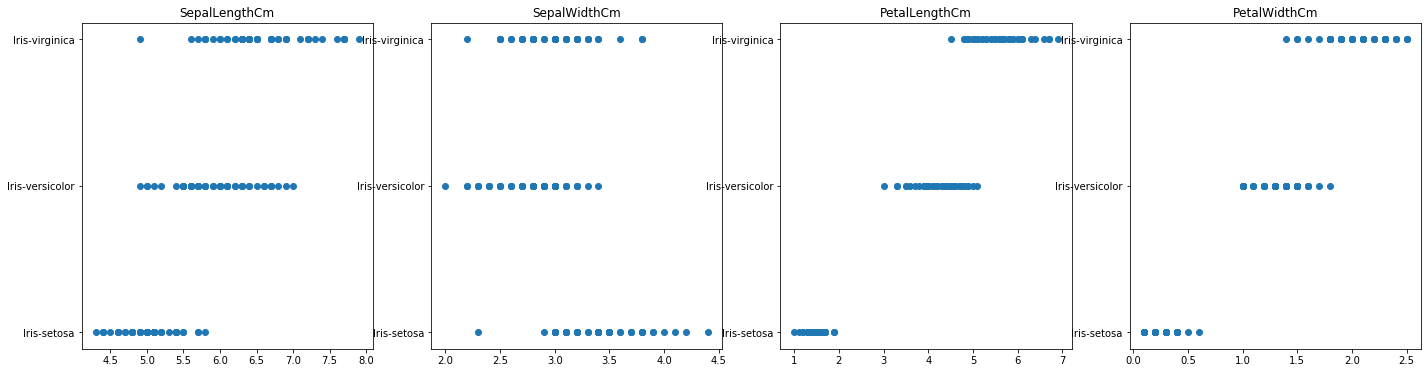

In [43]:
# SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.figure(figsize=(24, 6))

for i, column_name in enumerate(cols):
    plt.subplot(1, 4, i + 1)
    plt.scatter(iris_data[column_name], iris_data.Species)
    plt.title(column_name)

plt.show()

According to the charts above, there are 3 categories for target prediction and 4 features which can be used to train model.

### 4.3. Prepare data

In [44]:
# Remove Id column
data = iris_data.drop(columns=["Id"])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
# One-hot encoding categorical columns
categorical_cols = ["Species"]

for col in categorical_cols:
    city_encoded = pd.get_dummies(data[col])
    city_encoded.columns = [col + "_" + str(_col) for _col in city_encoded.columns]
    data = pd.concat([data.drop(columns=col), city_encoded], axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [46]:
# Seperate prediction/feature
data_x = data.iloc[:, :4]
data_y = data.iloc[:, 4:]
print(f"data_x: {data_x.shape}")
print(f"data_y: {data_y.shape}")

data_x: (150, 4)
data_y: (150, 3)


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Split train/test
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42, shuffle=True, stratify=data_y)
print(f"train_x: {train_x.shape}")
print(f"test_x: {test_x.shape}")
print(f"train_y: {train_y.shape}")
print(f"test_y: {test_y.shape}")

train_x: (120, 4)
test_x: (30, 4)
train_y: (120, 3)
test_y: (30, 3)


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Normalize all features to be in range [0, 1] for training set
scaler = MinMaxScaler()
scaler.fit(train_x)

train_x_scaled = scaler.transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=train_x.columns)
train_x_scaled.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,120.000000,120.000000,120.000000,120.000000
mean,0.429861,0.440972,0.483187,0.457292
std,0.224110,0.182189,0.305887,0.316839
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.105263,0.083333
50%,0.416667,0.416667,0.570175,0.500000
75%,0.583333,0.552083,0.719298,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [51]:
# Normalize all features to be in range [0, 1] for test set
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=test_x.columns)
test_x_scaled.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,30.000000,30.000000,30.000000,30.000000
mean,0.424074,0.431944,0.487135,0.459722
std,0.256351,0.177278,0.329174,0.327989
min,0.027778,0.125000,0.052632,0.000000
25%,0.194444,0.333333,0.087719,0.083333
50%,0.416667,0.416667,0.614035,0.541667
75%,0.604167,0.500000,0.719298,0.708333
max,0.944444,0.875000,1.035088,0.958333


In [52]:
# Convert type to numpy array
train_x_scaled = train_x_scaled.to_numpy()
train_x, train_y = train_x.to_numpy(), train_y.to_numpy()
test_x_scaled, test_y = test_x_scaled.to_numpy(), test_y.to_numpy()

### 4.4. Prepare model
KNN for qualitative data works exactly the same as KNN for quatitative data but instead of averaging k closest samples it takes majority vote to get final prediction.

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
class ClassifierKNN:
    def __init__(self, k=5, distance_method="Euclidean"):
        assert distance_method.lower() == "euclidean" or distance_method.lower() == "manhattan", \
        f"distance_method must be either Euclidean or Manhattan, but get {distance_method}"
        super().__init__()
        # Initial properties
        self.k = k
        self.distance_method = None
        self.x = None
        self.y = None
        
        # Get measure methods
        if distance_method.lower() == "euclidean":
            self.distance_method = EuclideanDistance()
        else:
            self.distance_method = ManhattanDistance()
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def _predict(self, x):
        # Get distance between new sample and other samples
        distance = self.distance_method(self.x, x)

        # Get top k closest indices
        top_k_indices = np.argsort(distance)[:self.k]

        # Get top k closest y
        top_k_y = self.y[top_k_indices]

        # Get confident score for each class
        confident = np.mean(top_k_y, axis=0)
        # Get majority vote class
        major_vote_index = np.argmax(confident)
        # Create zero mask
        predict = np.zeros_like(confident, dtype=int)
        # Set major class indice to 1
        predict[major_vote_index] = 1
        return predict
    
    def predict(self, x):
        preds = []
        for _x in x:
            pred = self._predict(_x)
            preds.append(pred)
        return np.asarray(preds)

In [55]:
# Test RegressionKNN
classifier_model = ClassifierKNN(k=5, distance_method="Euclidean")    # KNeighborsClassifier uses Euclidean distance
ex_classifier_model = KNeighborsClassifier(n_neighbors=5)

x = train_x_scaled[:10]
y = train_y[:10]

classifier_model.fit(x, y)
ex_classifier_model.fit(x, y)

pred = classifier_model.predict(x)
ex_pred = ex_classifier_model.predict(x)

assert np.all(np.equal(pred, ex_pred))
print("Pass")

Pass


### 4.5. Fit and evaluate model
For qualitative data we usually use accuracy metrics to evaluate model.

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
model = ClassifierKNN(k=5, distance_method="Euclidean")
evaluator = CrossValidation(accuracy_score, k_folds=10)

score = evaluator.eval(model, train_x, train_y)
print(f"Validation accuracy: {evaluator.scores}")
print(f"Validation mean accuracy: {score}")

Validation accuracy: [1.0, 0.8888888888888888, 1.0, 0.9444444444444444, 1.0, 0.9444444444444444, 0.9444444444444444, 1.0, 1.0, 0.9444444444444444]
Validation mean accuracy: 0.9666666666666666


### 4.6. Search for best hyperparameters

In [58]:
evaluator = CrossValidation(accuracy_score, k_folds=10)
searcher = GridSearcher(evaluator, criteria="max")

# Search for best parameters
params_grid = {"k": list(range(1, 41)), "distance_method": ["Euclidean", "Manhattan"]}
best_params, score = searcher.search(ClassifierKNN, train_x, train_y, params_grid)
print(f"best parameters: {best_params}")
print(f"score: {score}")

parameters: {'distance_method': 'Euclidean', 'k': 1} score: 0.9666666666666666
parameters: {'distance_method': 'Euclidean', 'k': 2} score: 0.961111111111111
parameters: {'distance_method': 'Euclidean', 'k': 3} score: 0.9666666666666666
parameters: {'distance_method': 'Euclidean', 'k': 4} score: 0.9722222222222223
parameters: {'distance_method': 'Euclidean', 'k': 5} score: 0.9666666666666666
parameters: {'distance_method': 'Euclidean', 'k': 6} score: 0.9722222222222223
parameters: {'distance_method': 'Euclidean', 'k': 7} score: 0.9777777777777779
parameters: {'distance_method': 'Euclidean', 'k': 8} score: 0.9722222222222223
parameters: {'distance_method': 'Euclidean', 'k': 9} score: 0.9777777777777779
parameters: {'distance_method': 'Euclidean', 'k': 10} score: 0.9777777777777779
parameters: {'distance_method': 'Euclidean', 'k': 11} score: 0.9722222222222223
parameters: {'distance_method': 'Euclidean', 'k': 12} score: 0.9666666666666668
parameters: {'distance_method': 'Euclidean', 'k': 

### 4.7. Evaluate on test set

In [59]:
# Define model and metrics
model = ClassifierKNN(**best_params)

# Fit model on traning set
model.fit(train_x_scaled, train_y)

# Evaluate on test set
pred_y = model.predict(test_x_scaled)
score = accuracy_score(test_y.reshape(-1, 1), pred_y.reshape(-1, 1))
print(f"Test error: {score}")

Test error: 1.0
